## Interpolation

Des fois en recolte les données avec 2 capteur le premier récolte 2 fois par seconde et l'autre recolete 4 fois par seconde ceci engendre des manques de données.

In [9]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt


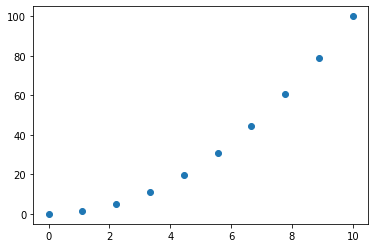

In [18]:
x=np.linspace(0,10,10)
y=x**2
plt.scatter(x,y)
plt.show()

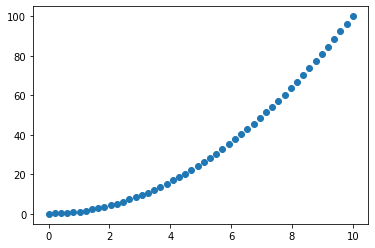

In [19]:
f=interp1d(x,y, kind='linear')
new_x=np.linspace(0,10,50)
f(new_x)
plt.scatter(new_x, f(new_x))

## Interpolation

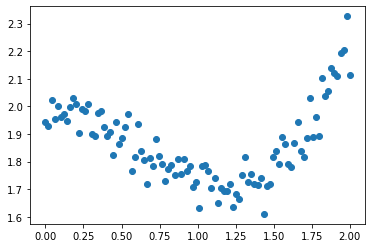

In [24]:
x=np.linspace(0, 2, 100)
noise=np.random.randn(x.shape[0])/20
y = 1/3 * x**3 - 3/5 * x**2 + 2 + noise
plt.scatter(x,y)

Utilisation de la methode des moindres carrés pour trouvé les bon paramétres d'un modéle f

In [46]:
from scipy import optimize

def f( x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

(params, params_cov) = optimize.curve_fit(f, x, y)

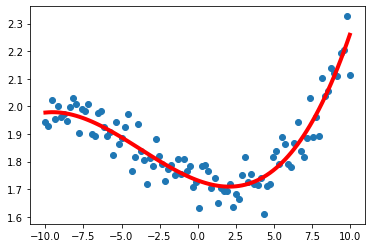

In [51]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c="red", lw=4)
plt.show()

Minimisation

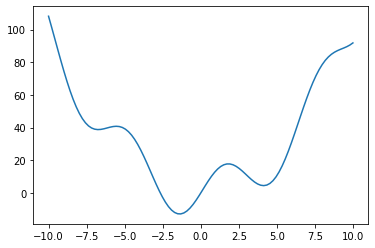

In [59]:
def f(x):
    return x**2 + 15*np.sin(x)

x=np.linspace(-10, 10, 100)
plt.plot(x,f(x))


In [68]:
x0=-5
x_min=optimize.minimize(f, x0=-5).x
x_min

array([-1.38505583])

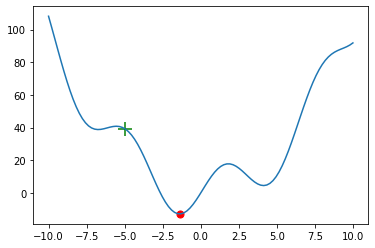

In [74]:
plt.plot(x,f(x))
plt.scatter(x_min,f(x_min),c="red",marker=".", s=200)#point de départ
plt.scatter(x0,f(x0),c="green",marker='+', s=200)#minimum Global

## Traitement des Signaux

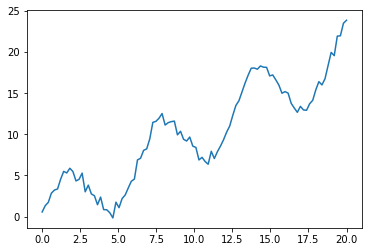

In [146]:
x=np.linspace(0,20,100)
y= x + 4 * np.sin(x)+ np.random.randn(x.shape[0])/2
plt.plot(x,y)

La transformé de fourrier Analyse les fréquences présentes dans un signal periodique

In [154]:
from scipy import fftpack

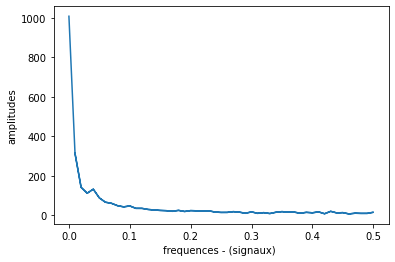

In [158]:
four = fftpack.fft(y)
amp = np.abs(four)
freq = np.abs(fftpack.fftfreq(y.size))

plt.plot(freq, amp)
plt.xlabel("frequences - (signaux) ")
plt.ylabel("amplitudes")
plt.show()

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


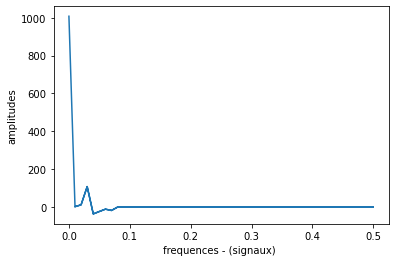

In [160]:
four[amp<50] = 0
plt.plot(freq, four)
plt.xlabel("frequences - (signaux) ")
plt.ylabel("amplitudes")
plt.show()

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


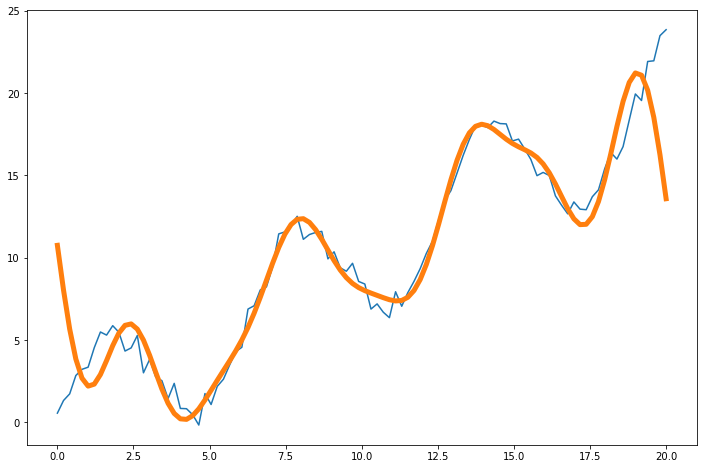

In [168]:
signal=fftpack.ifft(four)
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.plot(x, signal,lw=5)

## Traitement des images

Dilation imprime les images - l'erosion efface les pixels

In [169]:
from scipy import ndimage

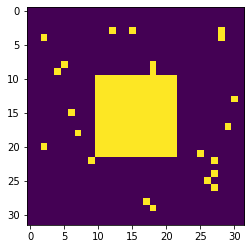

In [188]:
aray_gen=np.random.RandomState(seed =0)
#Création de image
X=np.zeros((32,32))
X[10:-10, 10:-10]=1
#Création du bruit
X[np.random.randint(2,32,30), np.random.randint(2,32,30)]=1
plt.imshow(X)

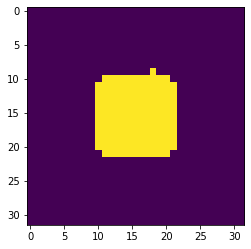

In [189]:
open_x=ndimage.binary_opening(X)
plt.imshow(open_x)

Extraction des informations

(740, 1300)

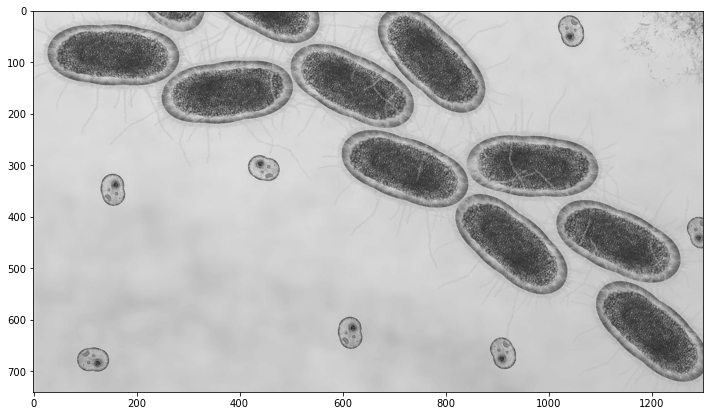

In [196]:
img=plt.imread("src/imgs/bacteries.jpeg")
img=img[:,:,0]
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
img.shape

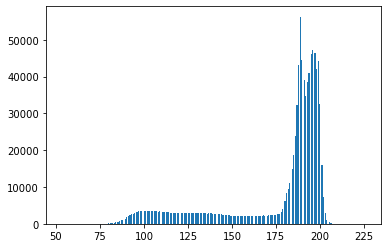

In [198]:
plt.hist(img.ravel(), bins=255)
plt.show()

(740, 1300)

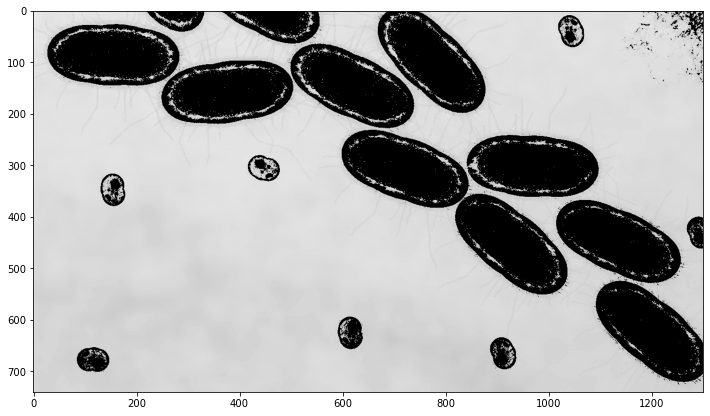

In [205]:
imgc=np.copy(img)
imgc[imgc < 175]=0
plt.figure(figsize=(12,8))
plt.imshow(imgc, cmap='gray')
imgc.shape

(740, 1300)

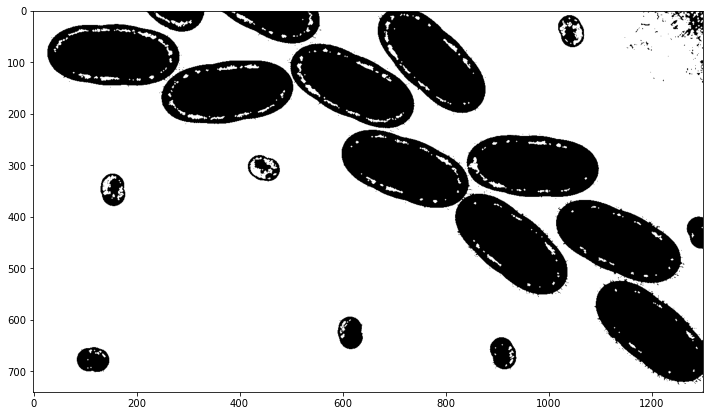

In [206]:
imgc=ndimage.binary_opening(imgc)
plt.figure(figsize=(12,8))
plt.imshow(imgc, cmap='gray')
imgc.shape

[[0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 0]] 298


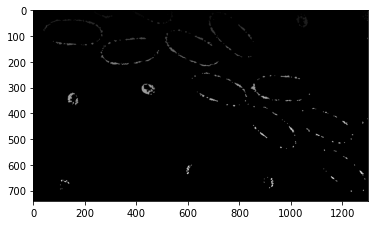

In [211]:
label, num_label=ndimage.label(imgc)
print(label, num_label)

plt.imshow(label ,cmap="gray")

In [ ]:
Afinir 